<a href="https://colab.research.google.com/github/TABARU-muu/2020615076/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
#결정트리를 가시화하기 위해 성별, 티켓, 운임만
df_x = df[['sex','pclass','fare']]
df_y = df['survived']

In [6]:
#문자행을 숫차로 변환
df_x = pd.get_dummies(df_x, drop_first=True)

In [7]:
#train_test_split를 사용해서 학습용과 테스트용으로 분할한다.
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df_x,df_y,random_state=1)

In [8]:
#결정트리의 모델을 작성
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=2, random_state=1)

In [9]:
#fit로 학습을 시킨다.
model.fit(train_x, train_y)
#max_depth는 트리의 최대 깊이를 표현하고 조건을 얼마나 분기시킬까 설정

DecisionTreeClassifier(max_depth=2, random_state=1)

In [10]:
#predict로 예측을 실치
model.predict(test_x)

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0])

In [11]:
#score로 정답율을 낸다.
model.score(test_x,test_y)

0.7533632286995515

[Text(0.5, 0.8333333333333334, 'sex_male <= 0.5\ngini = 0.466\nsamples = 668\nvalue = [421, 247]\nclass = y[0]'),
 Text(0.25, 0.5, 'pclass <= 2.5\ngini = 0.398\nsamples = 233\nvalue = [64, 169]\nclass = y[1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.105\nsamples = 126\nvalue = [7, 119]\nclass = y[1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.498\nsamples = 107\nvalue = [57, 50]\nclass = y[0]'),
 Text(0.75, 0.5, 'fare <= 26.269\ngini = 0.294\nsamples = 435\nvalue = [357, 78]\nclass = y[0]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.223\nsamples = 320\nvalue = [279, 41]\nclass = y[0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.436\nsamples = 115\nvalue = [78, 37]\nclass = y[0]')]

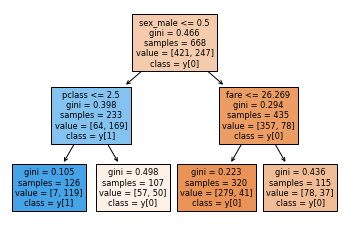

In [12]:
#plot_tree로 결정트리 모델을 트리 구조로 가시화
from sklearn.tree import plot_tree
plot_tree(model, feature_names=train_x.columns, class_names=True, filled=True)
